In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import chain

In [2]:
wgi = pd.read_excel('wgidataset.xlsx')

In [3]:
wgi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32100 entries, 0 to 32099
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   codeindyr     32100 non-null  object
 1   code          32100 non-null  object
 2   countryname   32100 non-null  object
 3   year          32100 non-null  int64 
 4   indicator     32100 non-null  object
 5   estimate      32100 non-null  object
 6   stddev        32100 non-null  object
 7   nsource       32100 non-null  object
 8   pctrank       32100 non-null  object
 9   pctranklower  32100 non-null  object
 10  pctrankupper  32100 non-null  object
dtypes: int64(1), object(10)
memory usage: 2.7+ MB


In [4]:
wgi = wgi.iloc[:, chain(range(2, 5), [8])]

In [5]:
wgi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32100 entries, 0 to 32099
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   countryname  32100 non-null  object
 1   year         32100 non-null  int64 
 2   indicator    32100 non-null  object
 3   pctrank      32100 non-null  object
dtypes: int64(1), object(3)
memory usage: 1003.3+ KB


In [6]:
wgi.head()

,countryname,year,indicator,pctrank
0,Afghanistan,1996,cc,4.301075
1,Albania,1996,cc,19.354839
2,Algeria,1996,cc,33.333332
3,American Samoa,1996,cc,..
4,Andorra,1996,cc,87.096771


In [7]:
wgi = wgi.loc[wgi['indicator'] == 'cc'].reset_index(drop=True)

In [8]:
wgi.head()

,countryname,year,indicator,pctrank
0,Afghanistan,1996,cc,4.301075
1,Albania,1996,cc,19.354839
2,Algeria,1996,cc,33.333332
3,American Samoa,1996,cc,..
4,Andorra,1996,cc,87.096771


In [9]:
wgi = wgi.replace({
    '..': np.nan
})

C:\Users\lazar\AppData\Local\Temp\ipykernel_9696\135315054.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  wgi = wgi.replace({


In [10]:
wgi.head()

,countryname,year,indicator,pctrank
0,Afghanistan,1996,cc,4.301075
1,Albania,1996,cc,19.354839
2,Algeria,1996,cc,33.333332
3,American Samoa,1996,cc,NaN
4,Andorra,1996,cc,87.096771


In [11]:
wgi.dtypes

countryname     object
year             int64
indicator       object
pctrank        float64
dtype: object

In [12]:
wgi_mundo = wgi.melt(
    id_vars='year',
    value_vars='pctrank',
    var_name='pct',
    value_name='valor'
)

In [13]:
wgi_mundo.head()

,year,pct,valor
0,1996,pctrank,4.301075
1,1996,pctrank,19.354839
2,1996,pctrank,33.333332
3,1996,pctrank,NaN
4,1996,pctrank,87.096771


In [14]:
wgi_mundo.head()

,year,pct,valor
0,1996,pctrank,4.301075
1,1996,pctrank,19.354839
2,1996,pctrank,33.333332
3,1996,pctrank,NaN
4,1996,pctrank,87.096771


In [15]:
wgi_mundo['valor'].describe()

count    5143.000000
mean       50.056446
std        29.072713
min         0.000000
25%        24.867725
50%        50.000000
75%        75.471695
max       100.000000
Name: valor, dtype: float64

In [16]:
wgi_mundo = wgi_mundo.groupby('year')['valor'].mean().reset_index()

In [17]:
wgi_mundo['regiao'] = 'Mundo'

In [18]:
wgi_mundo

,year,valor,regiao
0,1996,50.054626,Mundo
1,1998,50.051200,Mundo
2,2000,50.061916,Mundo
3,2002,50.064049,Mundo
4,2003,50.072403,Mundo
5,2004,50.014489,Mundo
6,2005,50.106559,Mundo
7,2006,50.078144,Mundo
8,2007,50.063318,Mundo
9,2008,50.089114,Mundo


In [19]:
wgi_brasil = wgi.loc[wgi['countryname'] == 'Brazil'].melt(
    id_vars='year',
    value_vars='pctrank',
    var_name='pct',
    value_name='valor'
)

In [20]:
wgi_brasil['regiao'] = 'Brasil'

In [21]:
wgi_brasil

,year,pct,valor,regiao
0,1996,pctrank,56.989246,Brasil
1,1998,pctrank,56.149734,Brasil
2,2000,pctrank,57.978722,Brasil
3,2002,pctrank,58.730160,Brasil
4,2003,pctrank,59.788361,Brasil
5,2004,pctrank,54.679802,Brasil
6,2005,pctrank,51.707317,Brasil
7,2006,pctrank,53.170731,Brasil
8,2007,pctrank,54.854370,Brasil
9,2008,pctrank,57.766991,Brasil


In [22]:
df = pd.concat([wgi_brasil, wgi_mundo], ignore_index=True).iloc[:, [0, 2 ,3]]

In [23]:
df

,year,valor,regiao
0,1996,56.989246,Brasil
1,1998,56.149734,Brasil
2,2000,57.978722,Brasil
3,2002,58.730160,Brasil
4,2003,59.788361,Brasil
5,2004,54.679802,Brasil
6,2005,51.707317,Brasil
7,2006,53.170731,Brasil
8,2007,54.854370,Brasil
9,2008,57.766991,Brasil


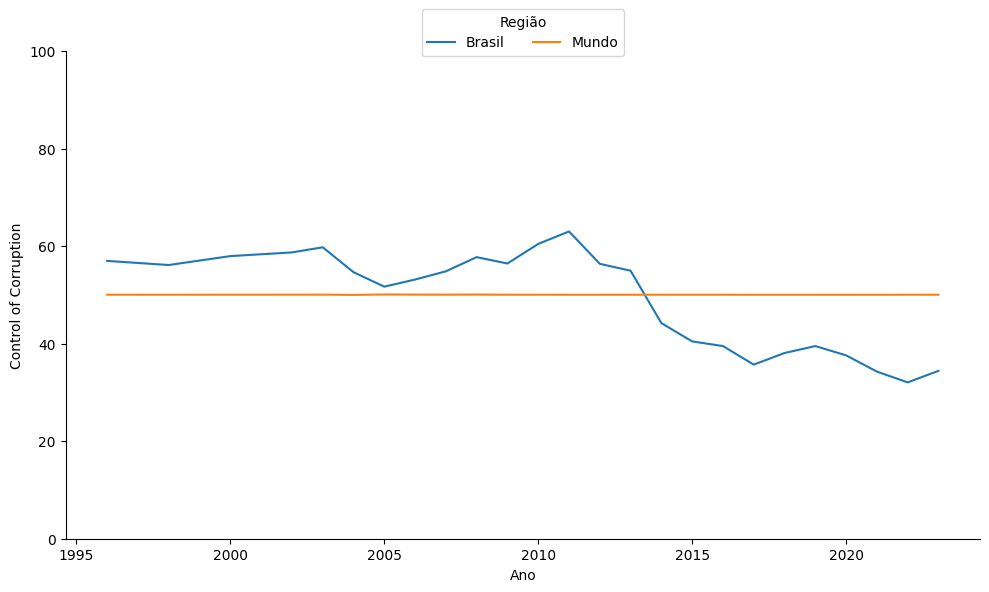

In [24]:
plt.figure(figsize=(10, 6))

sns.lineplot(df, x='year', y='valor', hue='regiao')

sns.despine()
plt.legend(title='Região', loc='upper center', bbox_to_anchor=(0.5, 1.1), ncols=2)
plt.ylim(0, 100)
plt.ylabel('Control of Corruption')
plt.xlabel('Ano')
plt.tight_layout()
plt.savefig('C:/Users/lazar/Master-Dissertation/figuras/comparacao_wgi_cc_brasil_mundo.png', dpi=300, bbox_inches='tight')
plt.show()